In [1]:
# ЗАГРУЗКА МОДЕЛИ  НЕЙРОCЕТИ И КАСКАДНОГО КЛАССИФИКАТОРА ИЗ БИБЛИОТЕКИ OPENCV
import cv2
import numpy as np
import keras


from keras.models import load_model
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import EarlyStopping, ModelCheckpoint

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

model = load_model('model.h5') #,safe_mode=True)

adam = Adam() #Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) default epsilon = 1e-07

In [2]:
import keras
print(keras.__version__)


2.13.1


In [2]:
import tensorflow
print(tensorflow.__version__)

2.13.0


In [3]:
cv2.__version__

'4.9.0'

In [ ]:
!pip3 install keras==2.13.1

In [2]:
# КОМПИЛЯЦМЯ МОДЕЛИ И ФУНКЦИЯ ПЕРЕЛАЧИ ИЗОБРАЖЕНИЯ В МОДЕЛЬ НЕЙРОСЕТИ (НА ВЫХОДЕ - КЛЮЧЕВЫЕ ТОЧКИ)

model.compile(optimizer=adam, loss='mean_squared_error', metrics=['mae', 'acc'], run_eagerly=True)
print(model)

def face_keys(face_image):
    gray_image = np.copy(face_image)
    gray_image = cv2.cvtColor(face_image, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, 1.25, 6)

    faces_cnn_data = np.ndarray(shape=(len(faces), 96, 96, 1), dtype='float', order='F')

    for i, (x,y,w,h) in enumerate(faces):
        faces_cnn_data[i, :, :, 0] = cv2.resize(gray_image[y:y+h, x:x+w], (96, 96), cv2.INTER_LINEAR) / 255

    try:
        faces_keypoints = model.predict(faces_cnn_data)
    except:
        # model = load_model('my_model.h5')
        model.compile(optimizer=adam, loss='mean_squared_error', metrics=['mae', 'acc'], run_eagerly=True)

        faces_keypoints = None
    if faces_keypoints is None:
        return face_image, []
    for i, (x,y,w,h) in enumerate(faces):
        # rescale keypoints on face
        faces_keypoints[i, 0::2] = faces_keypoints[i, 0::2] * (w/2) + (w/2) + x
        faces_keypoints[i, 1::2] = faces_keypoints[i, 1::2] * (h/2) + (h/2) + y
        faces_cnn_data[i,:,:,0] = cv2.resize(gray_image[y:y+h, x:x+w], (96, 96), cv2.INTER_LINEAR) /  255

        # find sunglasses width and height
        # w_sunglasses = int(np.linalg.norm(np.array(faces_keypoints[i, 5*2:5*2+2]) - np.array(faces_keypoints[i, 3*2:3*2+2])) * 1.20)   
        # h_sunglasses = int(suglasses_image.shape[0] / suglasses_image.shape[1] * w_sunglasses) # keep the w/h ratio

        # resize sunglasses
        # resized_sunglasses = cv2.resize(suglasses_image[:,:,:], (w_sunglasses, h_sunglasses), cv2.INTER_LINEAR)

        # # make mask for transparent area
        # sunglasses_mask = resized_sunglasses[:,:,3] > 0

        # # get suglasses x, y
        # sunglasses_x = int(((faces_keypoints[i, 2*2] + faces_keypoints[i, 4*2]) / 2) - (w_sunglasses / 2))
        # sunglasses_y = int(((faces_keypoints[i, 2*2 + 1] + faces_keypoints[i, 4*2 + 1]) / 2) - (h_sunglasses / 2))

        # # replace the sunglasses on face
        # face_image[sunglasses_y:sunglasses_y+resized_sunglasses.shape[0],
        #              sunglasses_x:sunglasses_x+resized_sunglasses.shape[1],:][sunglasses_mask] = \
        #              resized_sunglasses[:,:,0:3][sunglasses_mask]

    return face_image, faces_keypoints

In [3]:
# ФУНКЦИЯ РАСЧЕТА ВНИМАНИЯ ПО КООРДИНАТАМ ЗРАЧКОВ И КРАЕВ ГЛАЗА

fp = [440,202,385,210, # x,y зрачка,  x,y 2-го зрачка
      429,205,451,200, # x,y уголков глаза
      396,210,373,212] # x,y уголков 2-го глаза 

def look_forward (points):
    if len(points)<8:
        return False
    x0 = points[0] #440 x0 зрачка
    x1 = points[4] #429 x1 уголка глаза
    x2 = points[6] #451 x2 уголка глаза
    lx = x2-x1 #22
    l4 = lx/4 #5,5
    if x0>x2-l4:
       print("влево")
       return False
    if x0<x1+l4:
        print("вправо")
        return False
    y0 = points[1] #202
    y1 = points[5] #205
    y2 = points[7] #200
    d = lx/3 
    ym = (y1+y2)/2 #202,5
    if y0<ym-d/2:
        print("вверх")
        return False
    if y0>ym+d/2:
        print("вниз")
        return False
    return True

def look_forward2 (points):
    if len(points)<12:
        return False
    x0 = points[2] #
    x1 = points[10] #
    x2 = points[8] #
    lx = x2-x1 #22
    l4 = lx/4 #5,5
    if x0>x2-l4:
       print("влево")
       return False
    if x0<x1+l4:
        print("вправо")
        return False
    y0 = points[3] #
    y1 = points[11] #
    y2 = points[9] #
    d = lx/3 
    ym = (y1+y2)/2 #
    if y0<ym-d/2:
        print("вверх")
        return False
    if y0>ym+d/2:
        print("вниз")
        return False
    return True

look_forward (fp)

import matplotlib.pyplot as plt
 

< cv2.VideoCapture 000001EC8784BE50> True
timeout connection
socket.error:  [WinError 10022] Получен недопустимый аргумент
socket.error:  [WinError 10022] Получен недопустимый аргумент
socket.error:  [WinError 10022] Получен недопустимый аргумент
socket.error:  [WinError 10022] Получен недопустимый аргумент
socket.error:  [WinError 10022] Получен недопустимый аргумент
socket.error:  [WinError 10022] Получен недопустимый аргумент
1/1 [==============================] - 1s 1s/step
1.0 [[297.27408 215.98314 212.65498 226.01622 280.8179  220.25644 312.85776
  215.93149 227.99156 226.18526 196.45322 230.08716 269.5414  200.9017
  324.4804  195.04988 231.37253 206.50395 179.80887 213.81012 256.44553
  266.10632 298.0219  314.6467  232.86165 322.538   263.16376 308.81357
  265.057   330.5528 ]]
socket.error:  [WinError 10022] Получен недопустимый аргумент
1/1 [==============================] - 0s 51ms/step
1.0 [[314.22784 204.46219 231.10175 211.16774 298.98935 207.62282 329.1618
  205.09303 2

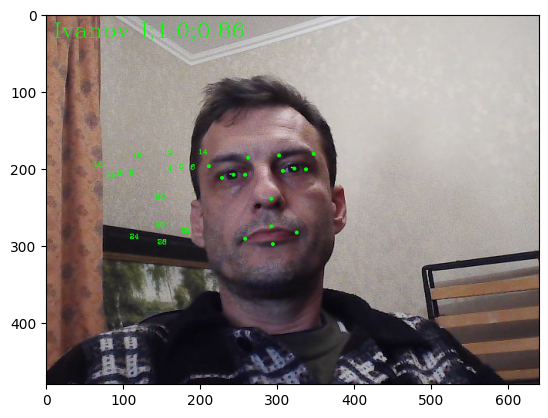

In [5]:
# ВИЗУАЛ ЧАСТЬ НА КЛИЕНТСКОЙ МАШИНЕ - БЕРЕТСЯ ИЗОБРАЖЕНИЕ С ВЕБ-КАМЕРЫ, ПЕРЕДАЕТСЯ В НЕЙРОСЕТЬ, РИСУЮТСЯ И ОБРАБАТЫВАЮТСЯ КЛЮЧЕВЫЕ ТОЧКИ, ВЫПЕЧАТЫВАЕТСЯ ВНИМАНИЕ И КООРДИНАТЫ ТОЧЕК 
# ПЕРЕДАЧА ДАННЫХ О ВЫЧИСЛЕННОЙ ВНИМАТЕЛЬНОСТИ УЧЕНИКОВ В СЕРВЕРНУЮ МАШИНУ

student = 'Ivanov I'

def draw_keypoints(im, keys):
    for i in range(0,len(keys),2):
        x=int(keys[i])
        y=int(keys[i+1])
        im=cv2.circle(im, (x,y), radius=1, color=(0,255,0), thickness=2)
        im=cv2.putText(im, str(i), (x-150,y), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.3, color=(0,255,0), thickness=0)
    return im

import socket
import random

sock = socket.socket()
sock.settimeout(1)
attentions = []

cv2.namedWindow('SHUSTRIK')
vc = cv2.VideoCapture(0)#,cv2.CAP_DSHOW)
print(vc, vc.isOpened())
paused = False
attention=0.0
while True:
    if vc.isOpened() and not paused:
        try:
            _, im = vc.read()
            if _: im, keys = face_keys(im)
            attention = 0
            if len(keys)>0:
                # print(len(keys))
                im = draw_keypoints(im, keys[0])
                attention = (0.0 + look_forward(keys[0]) + look_forward2(keys[0]))/2.0
                print(attention, keys)

            attentions.append(attention)
            mean1 = round(sum(attentions)/len(attentions), 2)
            im=cv2.putText(im, student + ';' +  str(attention) + ';' + str(mean1), (10,30), 
                            fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.9, color=(0,255,0), thickness=0)

            try:
                sock.connect(('192.168.88.161', 9091))
                sock.send(bytes(student + ';' +  str(attention) + ';' + str(mean1), 'utf-8'))
                data = sock.recv(1024)
                sock.close()
                print(data)
            except socket.timeout:
                print('timeout connection')
            except socket.error as e:
                print('socket.error: ', e)
            finally:
                pass
            cv2.imshow('SHUSTRIK', im)
        finally:
            pass

    k = cv2.waitKey(300)
    if k== ord(' '):  paused = not paused
    if k== ord('q'): #)& 0xFF
        vc.release() 
        cv2.destroyAllWindows()
        break

plt.imshow(im[:,:,::-1])

In [3]:
# vc.release()
cv2.destroyAllWindows()

In [ ]:
# когда ошибка работы Jupyter Notebook
!pip3 install typing-extensions --upgrade

In [10]:
#СЕРВЕР ПРИЕМА ДАННЫХ ОТ УЧЕНИКОВ
import socket

sock = socket.socket()
sock.bind(('', 9091))
sock.listen(5)


while True:
    conn, addr = sock.accept()

    print ('connected:', addr)
    data = conn.recv(1024)
    #if not data:     break
    if len(data)> 5: 
        print(data)
    ans=b'OK'
    conn.send(ans)
    conn.close()
    print('close')

connected: ('192.168.88.118', 62653)
b'Ermakova Margarita;0.97'
close
connected: ('192.168.88.199', 55564)
b'Shulga Artem; 0.9'
close
connected: ('192.168.88.193', 58576)
b'Krizhko Nikita; 0.46'
close
connected: ('192.168.88.195', 54228)
b'Moseychuk Ivan;0.44'
close
connected: ('192.168.88.173', 56638)
b'\xd0\x9b\xd0\x95\xd0\xa5\xd0\x90!;0.03'
close
connected: ('192.168.88.173', 56863)
b'CbIH MAMbI!;0.86'
close
connected: ('192.168.88.163', 59426)
b'egor krid; 0.35'
close
connected: ('192.168.88.118', 65383)
b'Ermakova Margarita;0.97; 0.89'
close
connected: ('192.168.88.163', 59923)
close
connected: ('192.168.88.163', 60023)


In [8]:
# ТЕСТ ПЕРЕЛАЧИ ДАННЫХ ОТ УЧЕНИКОВ
import socket
import random

sock = socket.socket()
sock.settimeout(5)
sock.connect(('192.168.88.161', 9091))
attention = random.randint(0,100)/100.0
sock.send(bytes('Perevyshin Vyacheslav; ' +  str(attention) + '; 0.89', 'utf-8'))

data = sock.recv(1024)
sock.close()

print(data)

ConnectionRefusedError: [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение

In [1]:
#СОХРАНЕНИЕ ДАННЫХ ОТ УЧЕНИКОВ

def create_csv_file(datatime, topic, students, attentions):
    with open(f'{datatime}.csv', 'w') as file:
        file.write('дата; тема занятия; ученик; внимание;\n')
        for student, attention in zip(students, attentions):
            file.write(f'{datatime};"{topic}";{student};{attention}%\n')


datatime = '6.04.2024'
topic = 'Нейросети'
students = ['иванов и.', 'петров а.', 'васечкин в.']
attentions = ['86', '80', '85']

create_csv_file(datatime, topic, students, attentions)

timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
timeout connection
(720, 1024, 3)


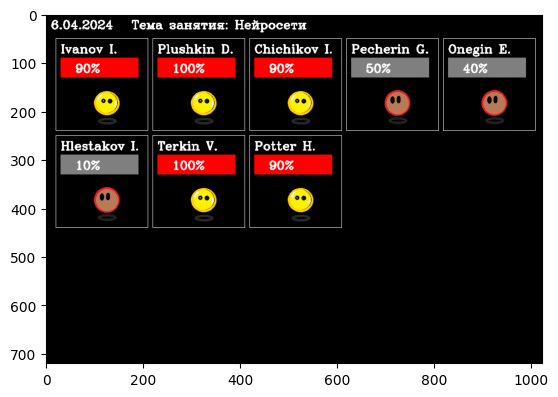

In [54]:
# ВИЗУАЛ ДАННЫХ ОТ УЧЕНИКОВ НА СЕРВЕРЕ

datatime = '6.04.2024'
topic = 'Нейросети'

import cv2
import numpy as np
import socket
import matplotlib.pyplot as plt

sock = socket.socket()
sock.bind(('', 9091))
sock.listen(5)
sock.setblocking(0)
sock.settimeout(1)


smile1 = cv2.imread('smile1.png')/255.0
smile2 = cv2.imread('smile2.png')/255.0
students = ['Ivanov I.', 'Plushkin D.', 'Chichikov I.', 'Pecherin G.', 'Onegin E.', 'Hlestakov I.', 'Terkin V.', 'Potter H.']
attention1= [.9,1,.9,.5,.4,.1,1,.9]
attention2= [.9,1,.9,.5,.4,.1,1,.9]
# students = ['-']
# attention1= [.9]
# attention2= [.9]
cv2.namedWindow('SHUSTRIK_attention')
shape = (720,1024,3)
img = np.zeros(shape)
size = 200
while 1>0:
    cv2.imshow('SHUSTRIK_attention', img)
    x=20
    y=50

    try:
        conn, addr = sock.accept()
        print ('connected:', conn, addr)
        data = conn.recv(1024)
        if len(data)> 5: 
            print(data)
            split_to_lists(str(data), students, attention1, attention2)
        conn.send(b'OK')
        conn.close()
        print('close')
    except socket.timeout:
        print('timeout connection')
    except socket.error as e:
        print('socket.error: ', e)
    finally:
        pass
    
    img[:,:,:]=0
    cv2.putText(img, datatime + '   Тема занятия: ' + topic, (10,30), cv2.FONT_HERSHEY_COMPLEX, .8, (1,1,1), 2)

    for student,attn,attn2 in zip(students,attention1,attention2):
        cv2.rectangle(img,(x,y),(x+size-10,y+size-10),(1,1,1),1)
        #print(attn)
        img[y+100:y+100+78, x+100-34:x+100-34+75] = smile1 if (attn>.5) else smile2
        cv2.putText(img, student, (x+10,y+30), cv2.FONT_HERSHEY_COMPLEX, .8, (1,1,1), 2)
        
        cv2.rectangle(img, (x+10,y+40), (x+10+size-40,y+40+40),(0,0,1) if attn2>.5 else (.5,.5,.5),-1)

        cv2.putText(img, str(int(round(attn2*100,0))) + '%', (x+40,y+70), cv2.FONT_HERSHEY_COMPLEX, .8, (1,1,1), 2)
        x += size
        if x> shape[1]-size:
            x=20
            y+=size
    k = cv2.waitKey(100)
    if k== ord('q'): 
        cv2.destroyAllWindows()
        break
print(img.shape)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# print(img.shape)
create_csv_file(datatime, topic, students, attentions)
plt.imshow(img[:,:,::-1])

In [44]:
sock.close()
cv2.destroyAllWindows()

In [13]:
#ОБРАБОТКА ДАННЫХ ОТ УЧЕНИКОВ НА СЕРВЕРЕ
students = []
attention1=[]
attention2=[]

def split_to_lists (s: str, students, attention1, attention2):    
    parts = s.replace("b'","").replace("'","").split(';')
    student = parts[0]
    try:
        att1 = float(parts[1].replace(" ","")) 
        att2 = float(parts[2].replace(" ",""))
    except:
        att1 = att2 = 0
    if student in students:
        index = students.index(student)
        attention1[index] = att1
        attention2[index] = att2
    else:
        students.append(student)
        attention1.append(att1)
        attention2.append(att2)

    return students, attention1, attention2

split_to_lists('Ivanov I;0.97; 0.89', students, attention1, attention2)
split_to_lists('Petrov I;1; 0.889', students, attention1, attention2)
split_to_lists('Ivanov I;0.957; 0.899', students, attention1, attention2)
split_to_lists('Sidorov V;0; 0.789', students, attention1, attention2)

# проверка результата функции
print(students)
print(attention1)
print(attention2)

['Ivanov I', 'Petrov I', 'Sidorov V']
[0.957, 1.0, 0.0]
[0.899, 0.889, 0.789]
